In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import plot_roc_curve
from print_conf_mat import * # Pretty Print confusion matrices

In [2]:
df = pd.read_csv("../Data/95_percent_var_PCs.csv")

In [3]:
X = df.loc[:,"PC1":"PC164"]
y = df.loc[:,"target"]

In [4]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# Train and Test a Polynomial Kernel SVM classifier

In [5]:
Polysvclassifier = SVC(kernel='poly', degree=3)
Polysvclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [6]:
y_pred = Polysvclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.50      0.65        20
           1       0.64      0.95      0.77        19

    accuracy                           0.72        39
   macro avg       0.78      0.72      0.71        39
weighted avg       0.78      0.72      0.70        39



(0, 2)

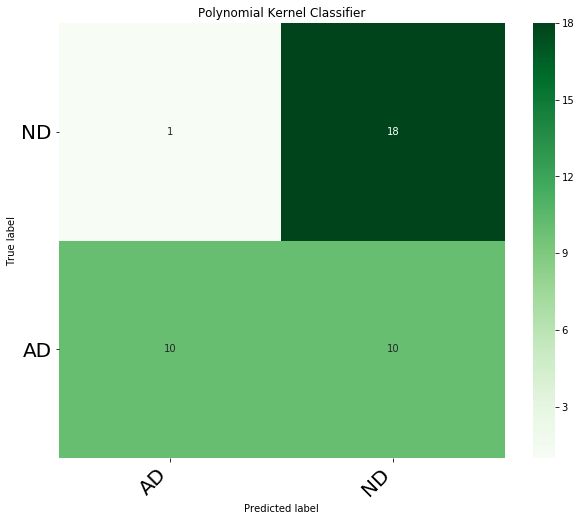

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
fig = print_confusion_matrix(cm, ["AD", "ND"], figsize=(10,8), fontsize=20, title="Polynomial Kernel Classifier")
# If cell annotations missaligned, comment/uncomment the following line
fig.gca().set_ylim([0,2])

# Train and test an radial bias function kernel SVM classifier

In [8]:
from sklearn.svm import SVC
RBFsvclassifier = SVC(kernel='rbf')
RBFsvclassifier.fit(X_train, y_train)

SVC()

In [9]:
y_pred = RBFsvclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.84      0.86        19

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



(0, 2)

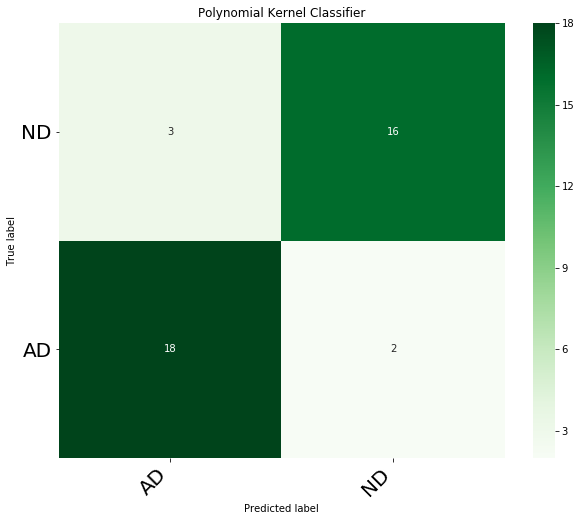

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
fig = print_confusion_matrix(cm, ["AD", "ND"], figsize=(10,8), fontsize=20, title="Polynomial Kernel Classifier")
# If cell annotations missaligned, comment/uncomment the following line
fig.gca().set_ylim([0,2])

# Train and test a sigmoid kernel SVM classifier

In [11]:
from sklearn.svm import SVC
Sigsvclassifier = SVC(kernel='sigmoid')
Sigsvclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [12]:
y_pred = Sigsvclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.88      0.79      0.83        19

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.85        39
weighted avg       0.85      0.85      0.85        39



(0, 2)

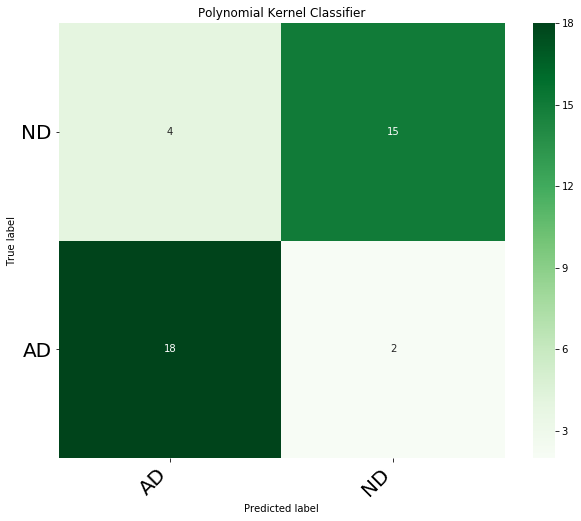

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
fig = print_confusion_matrix(cm, ["AD", "ND"], figsize=(10,8), fontsize=20, title="Polynomial Kernel Classifier")
# If cell annotations missaligned, comment/uncomment the following line
fig.gca().set_ylim([0,2])

# Train and test a linear SVM classifier

In [14]:
from sklearn.svm import SVC
Linearsvclassifier = SVC(kernel='linear')
Linearsvclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = Linearsvclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.84      0.86        19

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



(0, 2)

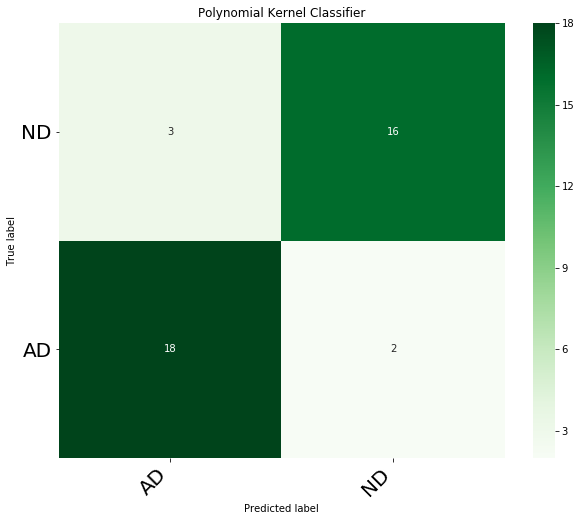

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
fig = print_confusion_matrix(cm, ["AD", "ND"], figsize=(10,8), fontsize=20, title="Polynomial Kernel Classifier")
# If cell annotations missaligned, comment/uncomment the following line
fig.gca().set_ylim([0,2])

# Train a polynomial SVM classifier on Differential Gene Expression 
- Training an Testing using the 266 most differentially expressed features data

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.84      0.86        19

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



(0, 2)

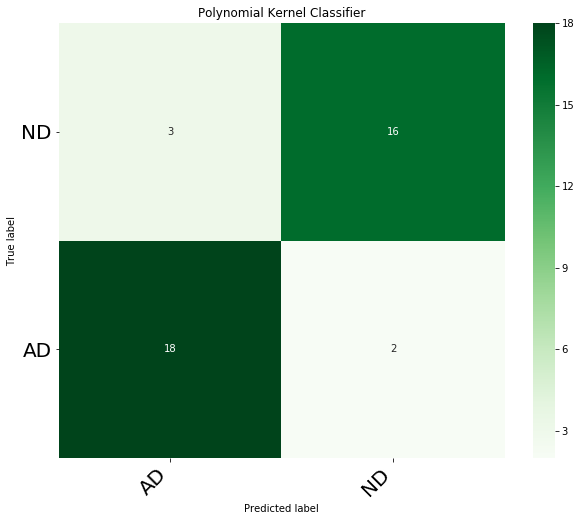

In [17]:
df = pd.read_csv("../Data/266_most_differentially_expressed_probes.csv")
df
X = df.loc[:,"ILMN_1654468":"ILMN_1717094"]
y = df.loc[:,"target"]
X_train_de , X_test_de, y_train_de, y_test_de = train_test_split(X, y, test_size = 0.20, random_state=0)

# Train 
PolysvclassifierDiffExp = SVC(kernel='poly', degree=3)
PolysvclassifierDiffExp.fit(X_train_de, y_train_de)

# Test 
y_pred = PolysvclassifierDiffExp.predict(X_test_de)

# Report Results
cm = confusion_matrix(y_test_de, y_pred)
print(classification_report(y_test_de, y_pred))
fig = print_confusion_matrix(cm, ["AD", "ND"], figsize=(10,8), fontsize=20, title="Polynomial Kernel Classifier")
# If cell annotations missaligned, comment/uncomment the following line
fig.gca().set_ylim([0,2])

# ROC and AUC for SVM classifiers using PCA data

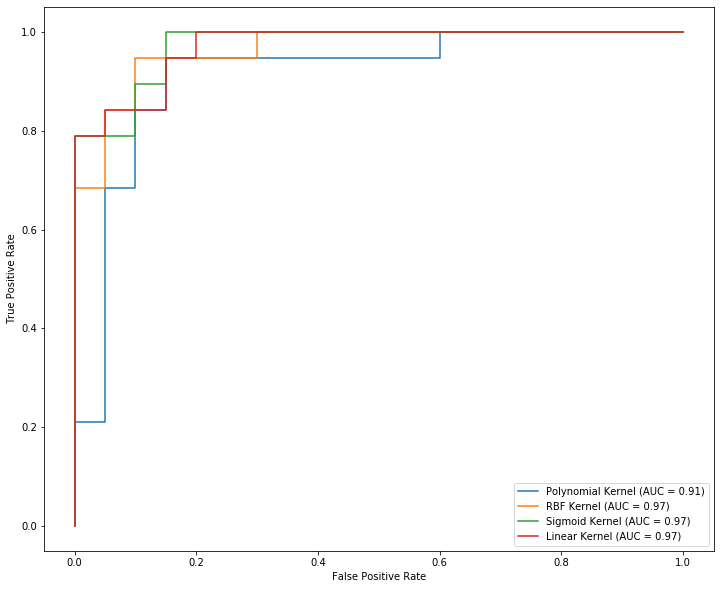

In [18]:
title = "ROC and AUC for SVM classifiers using PCA data"
svc_disp = plot_roc_curve(Polysvclassifier, X_test, y_test, label='Polynomial Kernel (AUC = 0.91)')
rbf_disp = plot_roc_curve(RBFsvclassifier, X_test, y_test, ax=svc_disp.ax_, label='RBF Kernel (AUC = 0.97)')
sig_disp = plot_roc_curve(Sigsvclassifier, X_test, y_test, ax=rbf_disp.ax_, label='Sigmoid Kernel (AUC = 0.97)')
linear_disp = plot_roc_curve(Linearsvclassifier, X_test, y_test, ax=sig_disp.ax_, label='Linear Kernel (AUC = 0.97)')

# Enlarge the Figure a bit
svc_disp.figure_.set_figwidth(12)
svc_disp.figure_.set_figheight(10)

# ROC and AUC for Polynomial SVM Classifiers: PCA versus Diff Exp

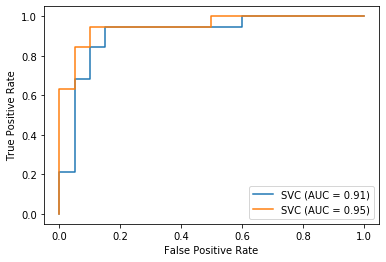

In [22]:
polynomial_showdown = plot_roc_curve(Polysvclassifier, X_test, y_test)
_ = plot_roc_curve(PolysvclassifierDiffExp, X_test_de, y_test_de, ax=polynomial_showdown.ax_)

# Enlarge the Figure a bit
polynomial_showdown.figure_.set_figwidth(12)
polynomial_showdown.figure_.set_figheight(10)